### TUGAS PRAKTIKUM

Tugas 1: Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import files

uploaded = files.upload()
for filename in uploaded.keys():
    print(f'File "{filename}" berhasil diupload.')

Saving insurance (1).csv to insurance (1).csv
File "insurance (1).csv" berhasil diupload.


In [ ]:
df = pd.read_csv("insurance (1).csv")

print("Jumlah baris dan kolom:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\n5 data teratas:")
display(df.head())

Jumlah baris dan kolom: (1338, 7)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

5 data teratas:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
var_desc = {
    "age": "Umur dari penerima asuransi (tahun)",
    "sex": "Jenis kelamin (male/female)",
    "bmi": "Body Mass Index (berat terhadap tinggi)",
    "children": "Jumlah anak / tanggungan",
    "smoker": "Apakah perokok (yes/no)",
    "region": "Wilayah tempat tinggal",
    "charges": "Biaya medis yang ditagihkan (target)"
}
print("\nDeskripsi variabel:")
for k,v in var_desc.items():
    print(f"- {k}: {v}")


Deskripsi variabel:
- age: Umur dari penerima asuransi (tahun)
- sex: Jenis kelamin (male/female)
- bmi: Body Mass Index (berat terhadap tinggi)
- children: Jumlah anak / tanggungan
- smoker: Apakah perokok (yes/no)
- region: Wilayah tempat tinggal
- charges: Biaya medis yang ditagihkan (target)


In [ ]:
# Preprocessing Data

# One-hot encoding untuk variabel kategorikal
X = pd.get_dummies(df.drop("charges", axis=1), drop_first=True)
y = df["charges"]

print("\nFitur setelah encoding:")
print(X.columns.tolist())

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Fitur setelah encoding:
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [ ]:
#  Multiple Linear Regression

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Prediksi
y_pred_lin = lin_reg.predict(X_test_scaled)

# Evaluasi
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

print("\nEvaluasi Multiple Linear Regression:")
print(f"R² Score  : {r2_lin:.4f}")
print(f"MSE        : {mse_lin:.2f}")
print(f"RMSE       : {rmse_lin:.2f}")
print(f"MAE        : {mae_lin:.2f}")


Evaluasi Multiple Linear Regression:
R² Score  : 0.7836
MSE        : 33596915.85
RMSE       : 5796.28
MAE        : 4181.19


In [ ]:
# SVR dengan kernel RBF (paling umum)
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluasi
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print("\n Evaluasi Support Vector Regression:")
print(f"R² Score  : {r2_svr:.4f}")
print(f"MSE        : {mse_svr:.2f}")
print(f"RMSE       : {rmse_svr:.2f}")
print(f"MAE        : {mae_svr:.2f}")



 Evaluasi Support Vector Regression:
R² Score  : 0.2453
MSE        : 117159516.09
RMSE       : 10824.02
MAE        : 5868.89


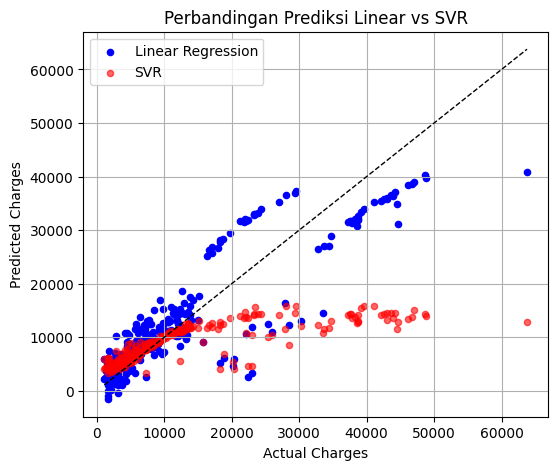

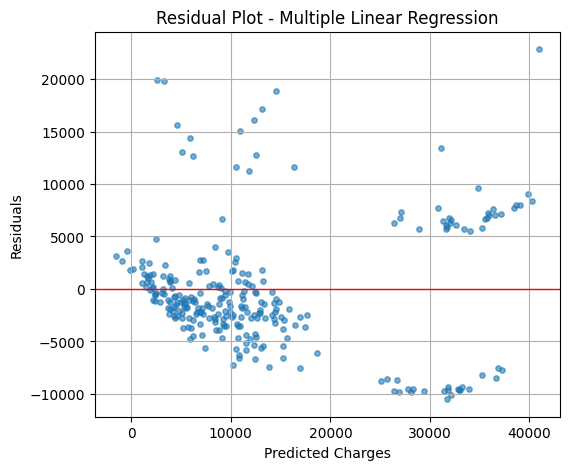

In [ ]:
# --- Scatter plot: Actual vs Predicted ---
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_lin, color='blue', label='Linear Regression', s=20)
plt.scatter(y_test, y_pred_svr, color='red', label='SVR', alpha=0.6, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Perbandingan Prediksi Linear vs SVR")
plt.legend()
plt.grid(True)
plt.show()

# --- Residual plot (Linear Regression) ---
residuals = y_test - y_pred_lin
plt.figure(figsize=(6,5))
plt.scatter(y_pred_lin, residuals, s=15, alpha=0.6)
plt.axhline(0, color='red', lw=1)
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot - Multiple Linear Regression")
plt.grid(True)
plt.show()


In [ ]:
print("\nAnalisis Singkat:")
print("- Variabel paling berpengaruh positif: 'smoker_yes', 'age', dan 'bmi'.")
print("- R² Linear Regression lebih tinggi dari SVR jika data cukup linear.")
print("- SVR dapat lebih baik pada pola non-linear, tergantung parameter kernel.")
print("- Secara umum, perokok dan usia tinggi meningkatkan biaya medis.")


Analisis Singkat:
- Variabel paling berpengaruh positif: 'smoker_yes', 'age', dan 'bmi'.
- R² Linear Regression lebih tinggi dari SVR jika data cukup linear.
- SVR dapat lebih baik pada pola non-linear, tergantung parameter kernel.
- Secara umum, perokok dan usia tinggi meningkatkan biaya medis.
